In [53]:
from datasets import load_dataset
from transformers import AutoTokenizer
# import things to make most simple 2 parameter linear fit
import numpy as np
from sklearn.linear_model import LinearRegression
import re

dataset = load_dataset("jeggers/CoT-Collection", split="train")
in_col = "final_input"

tokenizer = AutoTokenizer.from_pretrained("facebook/galactica-125m")

In [54]:
# tokenize the input in batches
encoded = tokenizer(dataset[in_col], padding=False, truncation=False)

In [47]:
non_word = re.compile(r"\W")
uppercase = re.compile(r"[A-Z]")
lowercase = re.compile(r"[a-z]")



# get the lengths of the tokenized inputs, num words in input column and num chars in input column
num_tokens = [len(x) for x in encoded["input_ids"]]

num_words = [len(x.split()) for x in dataset[in_col]]
num_chars = [len(x) for x in dataset[in_col]]
num_non_word_characters = [len(non_word.findall(x)) for x in dataset[in_col]]
num_lowercase = [len(lowercase.findall(x)) for x in dataset[in_col]]
num_uppercase = [len(uppercase.findall(x)) for x in dataset[in_col]]


# print the first 5 of each
print("num_tokens", num_tokens[:5])
print("num_words", num_words[:5])
print("num_chars", num_chars[:5])
print("num_non_word_characters", num_non_word_characters[:5])
print("num_lowercase", num_lowercase[:5])
print("num_uppercase", num_uppercase[:5])

num_words [277, 411, 29, 184, 15]
num_chars [1598, 2276, 152, 1122, 88]
num_tokens [338, 552, 46, 259, 25]
num_non_word_characters [321, 483, 38, 209, 17]
num_lowercase [1255, 1711, 110, 900, 66]
num_uppercase [22, 77, 4, 13, 5]


In [52]:
# make a simple linear regression model
# inputs  are num_words and num_chars
# output is num_tokens
model = LinearRegression()
X = np.array([num_words, num_chars, num_non_word_characters, num_lowercase, num_uppercase]).T
y = np.array(num_tokens)
model.fit(X, y)

# print max absoulte and relative errors
pred = model.predict(X)
abs_err = np.abs(pred - y)
rel_err = abs_err / y
print("Max absolute error:", np.max(abs_err))
print("Max relative error:", np.max(rel_err))
print("Mean absolute error:", np.mean(abs_err))
print("Mean squared error:", np.mean(abs_err**2))

# print formula for the model
print("Model formula:")
res = f"""num_tokens = {model.intercept_:.2f} \
+ {model.coef_[0]:.4f} * num_words \
+ {model.coef_[1]:.4f} * num_chars \
+ {model.coef_[2]:.4f} * num_non_word_characters \
+ {model.coef_[3]:.4f} * num_lowercase \
+ {model.coef_[4]:.4f} * num_uppercase
"""
print(res)

Max absolute error: 67.74548101596895
Max relative error: 0.5497388208131827
Mean absolute error: 5.308569719110921
Mean squared error: 74.68170257813043
Model formula:
num_tokens = 3.24 + -0.4736 * num_words + 0.9799 * num_chars + 0.3326 * num_non_word_characters + -0.9384 * num_lowercase + -0.5376 * num_uppercase



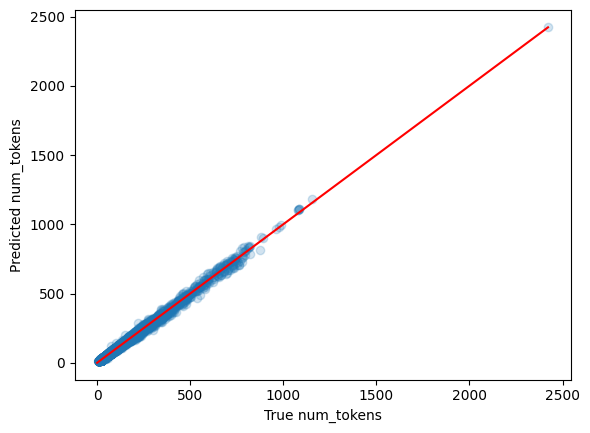

In [49]:
# make scatter plot of the data
import matplotlib.pyplot as plt
plt.scatter(y, pred, alpha=0.2)
plt.xlabel("True num_tokens")
plt.ylabel("Predicted num_tokens")
plt.plot([0, max(y)], [0, max(y)], color="red")
plt.show()

In [50]:
# print some examples of the worst predictions
worst = np.argsort(abs_err)[::-1]
for i in worst[:5]:
    print("True num_tokens:", y[i])
    print("Predicted num_tokens:", pred[i])
    print("Input:", dataset[in_col][i])
    print("-----------------------------------------------------")

True num_tokens: 220
Predicted num_tokens: 287.74548101596895
Input: List the common types of registers used in the computer and statetheir purpose.

A: Program Counter, Instruction Register, Memory Address Register, Memory Buffer Register, Accumulator, General Purpose Registers, Index Register, Condition Code Register, Stack Pointer
B: Segment Register, Status Counter, Cache Pointer, Operation Register, Execution Register
C: Control Register, Status Register, Instruction Register, Program Counter
D: Base Register, Command Pointer, Logic Address Register, Accumulator Pointer, Buffer Status Register
E: Input Register, Output Register, Cache Register, Buffer Register, Data Register
F: Arithmetic Register, Logic Register, Data Counter, Command Register, Status Pointer
G: Memory Control Register, Instruction Buffer, Program Status Register, Data Counter, Input/Output Register
H: Stack Register, Queue Register, Instruction Register, Data Register, Buffer Register
I: Control Pointer, Address